In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 13
plt.rcParams['axes.titlesize'] = 13

# Magnetic Field Of A Charged Wire

By using the Maxwell equations of magnetostatics, we can calculate the vector potential of a current density ($\vec{A}$)
$$
\vec{A}(\vec{r})=\frac{\mu_0}{4\pi}\int\frac{\vec{j}(\vec{r}')}{|\vec{r}-\vec{r}'|}\,\mathrm{d}V'
$$
And from which we can calculate the magnetic field ($\vec{B}$)
$$
\vec{B}(\vec{r})=\nabla\times\vec{A}(\vec{r})\\
$$

## 1.Straight Wire Along The Z-axis

We will only consider the xy plane, as all the other planes will behave equally (assuming the wire length is very long)

In [3]:
muo=1
j0=1 #The currect denstiy
r0=0.00001 #should be very small (radius of the wire) 
l0=1000 #should be large

In [4]:
#coordinates
maxPoint=5
pointsNumber=50
coord=np.array(np.meshgrid(
    np.linspace(-maxPoint,maxPoint,pointsNumber),
    np.linspace(-maxPoint,maxPoint,pointsNumber),
    [0],
    indexing='ij'))
#vector subspace representing the xy plane
d=2*maxPoint / (pointsNumber-1) #step size

In [5]:
#vector potential
A=np.array(np.meshgrid(
    np.zeros(pointsNumber),
    np.zeros(pointsNumber),
    [0],
    indexing='ij'))

### Calculating The Vector Potential
#### Numerical Solution 

In [6]:
rjPoints= 5001 # number of points representing the wire (Z-axis)
jR=[0,0,j0]  # the current density at any point on the wire.
for i in range (pointsNumber):
    for j in range (pointsNumber):
       r=np.array([-maxPoint+i*d,-maxPoint+j*d,0])
       #r: position at which we are calculating A
       for k in np.linspace(-l0,l0,rjPoints):
           rj=np.array([0,0,k])  #represents the coordinates of the wire(z axis) at point k
           A[:,i,j,0]=A[:,i,j,0] + jR / np.linalg.norm(r-rj) #calculating the vector potential

In [7]:
dz=(2*l0)/(rjPoints-1)
wireArea=np.pi * r0**2  
#dv' = dx *dy * dz = wire cross-section area * dz
A=A* muo/(4*np.pi) *wireArea*dz 

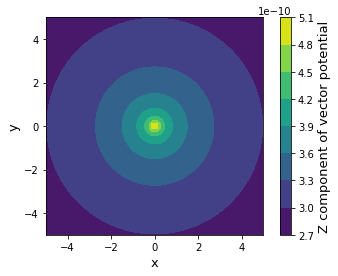

In [8]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.set_aspect(1)
plt.xlabel('x')
plt.ylabel('y')
plt.contourf(coord[0,:,:,0],coord[1,:,:,0],A[2,:,:,0]) #plotting Az
plt.colorbar().set_label('Z component of vector potential')

#### Analytical Solution

$$ \vec{A}(\vec{r}) = \frac{\mu_0}{2\pi}jF\log\frac{2l_0}{\sqrt{x^2+y^2}}\vec{e}_z$$

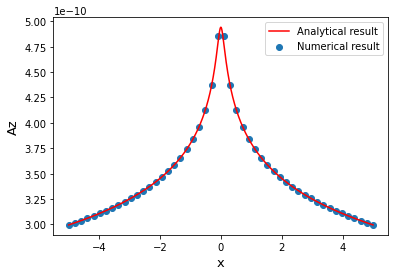

In [9]:
plt.xlabel('x')
plt.ylabel('Az')

#plotting Az at y=pointsNumber//2 (close to 0)
plt.scatter(coord[0,:,pointsNumber//2,0],A[2,:,pointsNumber//2,0],label='Numerical result')
x=np.linspace(-maxPoint,maxPoint,10000)
plt.plot(x,
    muo/(2*np.pi)*j0*wireArea*np.log(2*l0/np.sqrt(x**2+coord[1,0,pointsNumber//2,0]**2)),
    'red',
    label='Analytical result'
)
plt.legend()

__We can calculate the magnetic field__

$$ 
\vec{B}(\vec{r})=\nabla\times\vec{A}(\vec{r})=
\begin{pmatrix}
\frac{\partial}{\partial y}A_z(\vec{r}) - \frac{\partial}{\partial z}A_y(\vec{r})\\
\frac{\partial}{\partial z}A_x(\vec{r}) - \frac{\partial}{\partial x}A_z(\vec{r})\\
\frac{\partial}{\partial x}A_y(\vec{r}) - \frac{\partial}{\partial y}A_x(\vec{r})\\
\end{pmatrix}
$$
$$\because
\frac{\partial }{\partial z} A_x(\vec{r}) = \frac{\partial }{\partial z} A_y(\vec{r}) = 0
$$
$$\therefore \vec{B}(\vec{r}=\begin{pmatrix}
\frac{\partial}{\partial y}A_z(\vec{r})\\
 - \frac{\partial}{\partial x}A_z(\vec{r})\\
\frac{\partial}{\partial x}A_y(\vec{r}) - \frac{\partial}{\partial y}A_x(\vec{r})\\
\end{pmatrix}\\
$$

In [10]:
def zpartialY():
    #using the centeral difference method
    #there will be a problem with edges if you recall from calculating the velocity and acceleration notebook
    #because we are dealing with an array with a certain beginning and ending
    #we can use forward and backword methods to calculate the edges, or we can just ingore those points, as they don't mean much
    return (A[2,1:-1,2:,0]-A[2,1:-1,:-2,0])/(2*d)

In [11]:
def zpartialX():
    return (A[2,2:,1:-1,0]-A[2,:-2,1:-1,0])/(2*d)

In [12]:
def ypartialX():
    return (A[1,2:,1:-1,0]-A[1,:-2,1:-1,0])/(2*d)

In [13]:
def xpartialY():
    return (A[0,1:-1,2:,0]-A[0,1:-1,:-2,0])/(2*d)

In [14]:
# Empty magnetic field array
B=np.array(np.meshgrid(
    np.zeros(pointsNumber),
    np.zeros(pointsNumber),
    [0],
    indexing='ij'))

In [15]:
B[0,1:-1,1:-1,0]=zpartialY()
B[1,1:-1,1:-1,0]=-zpartialX()
B[2,1:-1,1:-1,0]=ypartialX()-xpartialY()

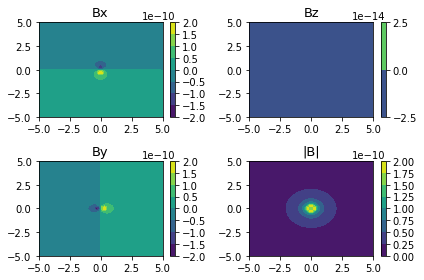

In [16]:
#plotting B with respect to x, y, and z components
#also plotiing |B|
i=0
fig, axs = plt.subplots(2, 2)
letter='x'
for col in range(2):
    for row in range(2):
        if(col==1 and row==1):
            break
        ax = axs[row, col]
        pcm = ax.contourf(coord[0,:,:,0],coord[1,:,:,0],B[i,:,:,0])
        ax.set_title(f"B{letter}")
        letter=chr(ord(letter)+1)
        fig.colorbar(pcm, ax=ax)
        i=i+1
pcm=axs[1,1].contourf(coord[0,:,:,0],coord[1,:,:,0],np.sqrt(B[0,:,:,0]**2+B[1,:,:,0]**2+B[2,:,:,0]**2))
axs[1,1].set_title("|B|")
fig.colorbar(pcm, ax=axs[1,1])
plt.tight_layout()

#### Analytical Solution

$$\vec{B}(\vec{r}) = \frac{\mu_0}{2\pi}\frac{I}{\sqrt{x^2+y^2}}\begin{pmatrix}-y\\x\\0\end{pmatrix}$$
where $I = j\times\text{Area}$

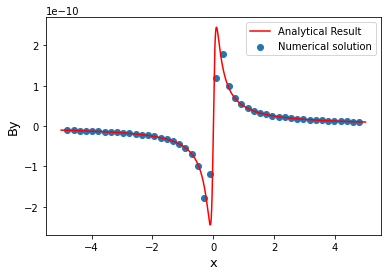

In [17]:
plt.xlabel('x')
plt.ylabel('By')

#plotting By at y=pointsNumber//2 (around 0)
plt.scatter(coord[0,1:-1,pointsNumber//2,0],B[1,1:-1,pointsNumber//2,0],label='Numerical solution')
x=np.linspace(-maxPoint,maxPoint,10000)
plt.plot(
    x,
    muo/(2*np.pi) *j0*wireArea/np.sqrt(x**2+ coord[1,0,pointsNumber//2,0]**2)**2 * x,
    'red',
    label='Analytical Result'
)
plt.legend()

### Visualization

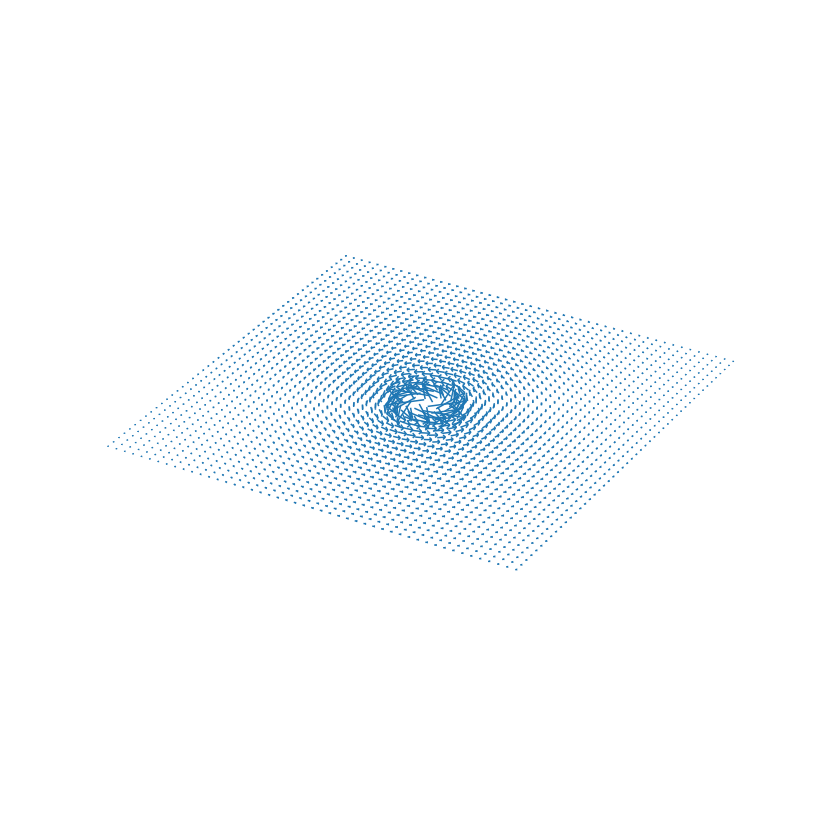

In [19]:
arrowplot = plt.axes(projection='3d')
arrowplot.set_zlim(-1,1)
arrowplot.axis(False) #remove axis to see the image more clearly
scale=0.5e10
plt.rcParams['figure.figsize'] =[35,15] # make the figure size bigger.
arrowplot.quiver(
    coord[0],coord[1],coord[2],
    B[0]*scale, B[1]*scale,B[2]*scale
    )